In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [6]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
df =pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [13]:
X = df.values
y = dataset.target

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [35]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

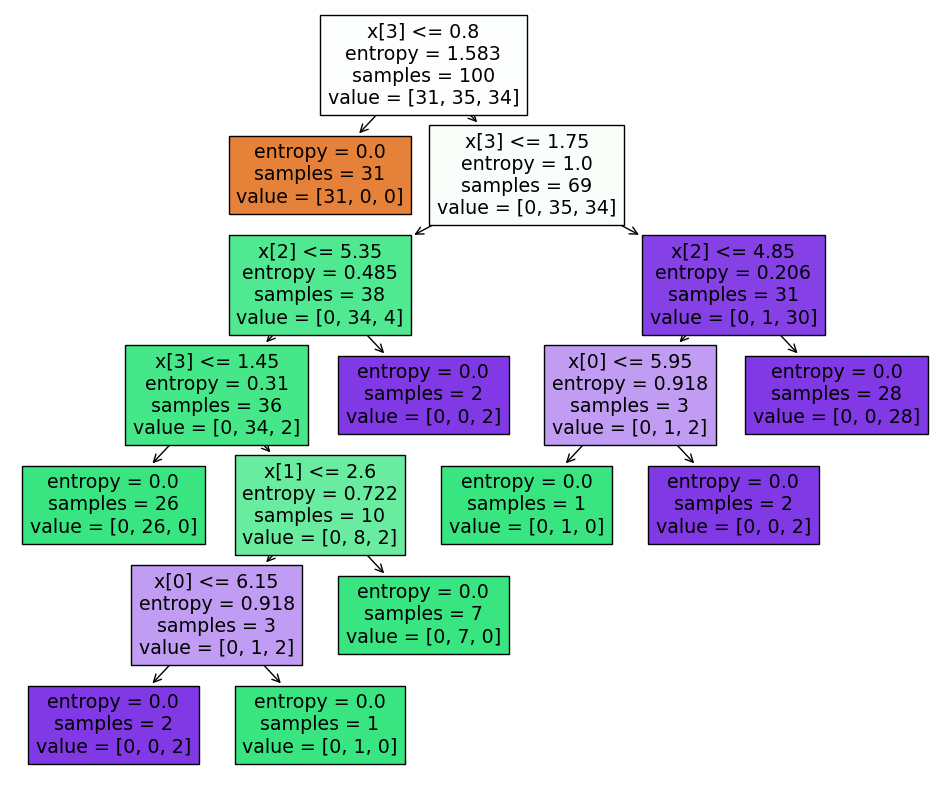

In [37]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True)

In [38]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth =2)

In [39]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

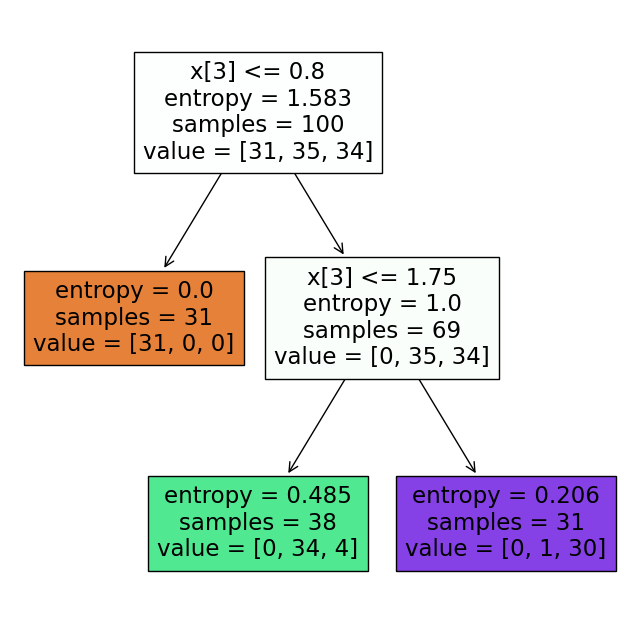

In [44]:
plt.figure(figsize=(8,8))
tree.plot_tree(clf,filled=True)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
from sklearn.metrics import *
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


## PREPRUNNING

In [69]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
parameter = {
    'criterion' :['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth' :[0,1,2,3,4,5,6,7],
    'max_features':['auto','sqrt','log2']
}
clf = GridSearchCV(clf,cv=5,param_grid=parameter,refit=True,scoring='accuracy',verbose=2)

In [70]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterio

[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, splitter=best; total ti

[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best; total ti

[CV] END criterion=entropy, max_depth=2, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_featu

[CV] END criterion=entropy, max_depth=5, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_featu

[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2

[CV] END criterion=log_loss, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=5

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [71]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [72]:
y_pred = clf.predict(X_test)

In [73]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.88
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.71      0.83        21
           2       0.62      1.00      0.77        10

    accuracy                           0.88        50
   macro avg       0.88      0.90      0.87        50
weighted avg       0.93      0.88      0.88        50

[[19  0  0]
 [ 0 15  6]
 [ 0  0 10]]
